In [5]:
import xarray as xr

df_hourly = xr.open_dataset("data/test1.nc")
df_daily = xr.open_dataset("data/test3.nc")

In [6]:
df_hourly

<xarray.Dataset> Size: 199MB
Dimensions:     (valid_time: 48, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 384B 2025-01-01 ... 2025-01-02T23...
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 768B ...
Data variables:
    mx2t        (valid_time, latitude, longitude) float32 199MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-20T12:55 GRIB to CDM+CF via cfgrib-0.9.1...

In [7]:
df_daily

<xarray.Dataset> Size: 12MB
Dimensions:     (valid_time: 3, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 24B 2025-01-01 2025-01-02 2025-01-03
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      (valid_time) <U4 48B ...
Data variables:
    mx2t        (valid_time, latitude, longitude) float32 12MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-09-21T11:29 GRIB to CDM+CF via cfgrib-0.9.1...

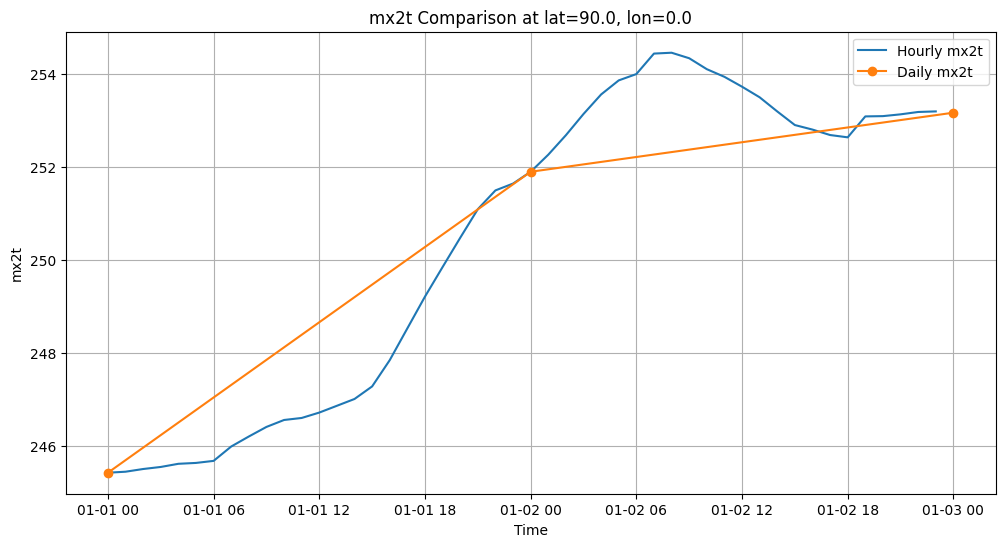

In [8]:
import matplotlib.pyplot as plt

# Select a specific location (e.g., the first latitude and longitude)
lat = df_hourly.latitude.values[0]
lon = df_hourly.longitude.values[0]

# Extract mx2t time series for the selected location
mx2t_hourly = df_hourly['mx2t'].sel(latitude=lat, longitude=lon)
mx2t_daily = df_daily['mx2t'].sel(latitude=lat, longitude=lon)

plt.figure(figsize=(12, 6))
plt.plot(df_hourly['valid_time'], mx2t_hourly, label='Hourly mx2t')
plt.plot(df_daily['valid_time'], mx2t_daily, 'o-', label='Daily mx2t')
plt.xlabel('Time')
plt.ylabel('mx2t')
plt.title(f'mx2t Comparison at lat={lat}, lon={lon}')
plt.legend()
plt.grid(True)
plt.show()